In [84]:
import pandas as pd
import spacy
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_fake=pd.read_csv('Fake.csv')
df_true=pd.read_csv('True.csv')

In [3]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
df_fake.shape

(23481, 4)

In [5]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [6]:
df_fake.isnull().values.any()

False

In [7]:
df_fake.apply(pd.isnull).sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [8]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [9]:
df_true.shape

(21417, 4)

In [10]:
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [11]:
df_true.isnull().values.any()

False

In [12]:
df_true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [13]:
df_fake.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [14]:
df_true.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [15]:
labels_fake=[]
for i in df_fake['text']:
    labels_fake.append(1)

In [16]:
len(labels_fake)

23481

In [17]:
df_fake['label']=labels_fake

In [18]:
df_fake=df_fake.sample(df_true.shape[0],random_state=101)

In [19]:
df_fake.head()

,title,text,subject,date,label
22470,SHOUT! POLL: Do the ‘White Helmets’ Qualify fo...,21st Century Wire asks Currently throughout t...,US_News,"September 25, 2016",1
7844,Hillary Absolutely DESTROYS Trump’s Stupid Sl...,There s absolutely nothing more frustrating th...,News,"February 26, 2016",1
21153,"HILLARY LANDS COVETED Taxpayer Funded, Planned...","Sadly, this will be the only reason many women...",left-news,"Jan 8, 2016",1
1430,Trump Whines About Unfair Media During Coast ...,Amateur president Donald Trump used his commen...,News,"May 17, 2017",1
18446,WATCH: DID JOHNNY DEPP Just Make A Career-Endi...,"Introducing his 2004 film The Libertine, about...",left-news,"Jun 23, 2017",1


In [20]:
labels_true=[]
for i in df_true['text']:
    labels_true.append(0)

In [21]:
len(labels_true)

21417

In [22]:
df_true['label']=labels_true

In [23]:
df_true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [24]:
df=pd.concat([df_fake,df_true],axis=0)

In [25]:
df.sample(5)

,title,text,subject,date,label
21118,"Xi, Putin agree to 'appropriately deal' with N...",BEIJING (Reuters) - Chinese President Xi Jinpi...,worldnews,"September 3, 2017",0
12719,At least 45 killed in ethnic fighting in South...,JUBA (Reuters) - At least 45 people have died ...,worldnews,"December 8, 2017",0
19628,WOW! SCRUBBED 1998 GEORGE SOROS Video Resurfac...,Knowing there were problems ahead for the Jews...,left-news,"Nov 12, 2016",1
17879,THOUSANDS Of Containers ROTTING At San Juan Po...,San Juan s mayor railed against President Trum...,left-news,"Oct 1, 2017",1
3947,NSA collected Americans' phone records despite...,WASHINGTON (Reuters) - The U.S. National Secur...,politicsNews,"May 2, 2017",0


In [26]:
df.shape

(42834, 5)

In [27]:
df['label'].value_counts()

label
1    21417
0    21417
Name: count, dtype: int64

In [28]:
sw=stopwords.words('english')

In [29]:
lemmatizer=WordNetLemmatizer()

In [30]:
def preprocessing(text):
    text=text.lower()
    text=re.sub('[^a-z]',' ',text)
    text=re.sub('\s+[a-z]\s+',' ',text)
    text=re.sub('\s+',' ',text)
    words=text.split()
    words=[word for word in words if word not in sw]
    words=[lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

In [31]:
df['pre_text']=df['text'].apply(preprocessing)

In [32]:
df.head()

,title,text,subject,date,label,pre_text
22470,SHOUT! POLL: Do the ‘White Helmets’ Qualify fo...,21st Century Wire asks Currently throughout t...,US_News,"September 25, 2016",1,st century wire asks currently throughout west...
7844,Hillary Absolutely DESTROYS Trump’s Stupid Sl...,There s absolutely nothing more frustrating th...,News,"February 26, 2016",1,absolutely nothing frustrating hearing donald ...
21153,"HILLARY LANDS COVETED Taxpayer Funded, Planned...","Sadly, this will be the only reason many women...",left-news,"Jan 8, 2016",1,sadly reason many woman vote hillary crime sud...
1430,Trump Whines About Unfair Media During Coast ...,Amateur president Donald Trump used his commen...,News,"May 17, 2017",1,amateur president donald trump used commenceme...
18446,WATCH: DID JOHNNY DEPP Just Make A Career-Endi...,"Introducing his 2004 film The Libertine, about...",left-news,"Jun 23, 2017",1,introducing film libertine th century poet not...


In [33]:
X_train,X_test,y_train,y_test=train_test_split(df['pre_text'],df['label'],test_size=0.2,random_state=101,stratify=df['label'],
                                              shuffle=True)

In [34]:
X_train.shape

(34267,)

In [35]:
X_test.shape

(8567,)

In [36]:
y_train.value_counts()

label
0    17134
1    17133
Name: count, dtype: int64

In [37]:
y_test.value_counts()

label
1    4284
0    4283
Name: count, dtype: int64

In [53]:
clf=Pipeline([
    ('cv',CountVectorizer()),
    ('knn',KNeighborsClassifier(n_neighbors=10,metric='cosine'))
])

In [54]:
clf.fit(X_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('knn', KNeighborsClassifier(metric='cosine', n_neighbors=10))])

In [55]:
y_pred1=clf.predict(X_test)

In [56]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.79      0.99      0.87      4283
           1       0.98      0.73      0.84      4284

    accuracy                           0.86      8567
   macro avg       0.88      0.86      0.86      8567
weighted avg       0.88      0.86      0.86      8567



In [57]:
clf2=Pipeline([
    ('cv',CountVectorizer(ngram_range=(1,2))),
    ('knn',KNeighborsClassifier(n_neighbors=10,metric='cosine'))
])

In [58]:
clf2.fit(X_train,y_train)

Pipeline(steps=[('cv', CountVectorizer(ngram_range=(1, 2))),
                ('knn', KNeighborsClassifier(metric='cosine', n_neighbors=10))])

In [59]:
y_pred2=clf2.predict(X_test)

In [60]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.78      0.99      0.87      4283
           1       0.98      0.73      0.84      4284

    accuracy                           0.86      8567
   macro avg       0.88      0.86      0.86      8567
weighted avg       0.88      0.86      0.86      8567



In [61]:
clf3=Pipeline([
    ('cv',CountVectorizer(ngram_range=(1,3))),
    ('knn',KNeighborsClassifier(n_neighbors=10,metric='cosine'))
])

In [62]:
clf3.fit(X_train,y_train)

Pipeline(steps=[('cv', CountVectorizer(ngram_range=(1, 3))),
                ('knn', KNeighborsClassifier(metric='cosine', n_neighbors=10))])

In [63]:
y_pred3=clf3.predict(X_test)

In [64]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.78      0.99      0.87      4283
           1       0.98      0.73      0.83      4284

    accuracy                           0.86      8567
   macro avg       0.88      0.86      0.85      8567
weighted avg       0.88      0.86      0.85      8567



In [70]:
clf5=Pipeline([
    ('cv',CountVectorizer()),
    ('nv',MultinomialNB(alpha=0.75))
])

In [71]:
clf5.fit(X_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('nv', MultinomialNB(alpha=0.75))])

In [72]:
y_pred5=clf5.predict(X_test)

In [74]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      4283
           1       0.95      0.91      0.93      4284

    accuracy                           0.93      8567
   macro avg       0.93      0.93      0.93      8567
weighted avg       0.93      0.93      0.93      8567



In [75]:
clf6=Pipeline([
    ('cv',CountVectorizer(ngram_range=(1,2))),
    ('nv',MultinomialNB(alpha=0.75))
])

In [76]:
clf6.fit(X_train,y_train)

Pipeline(steps=[('cv', CountVectorizer(ngram_range=(1, 2))),
                ('nv', MultinomialNB(alpha=0.75))])

In [77]:
y_pred6=clf6.predict(X_test)

In [78]:
print(classification_report(y_test,y_pred6))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      4283
           1       0.97      0.94      0.96      4284

    accuracy                           0.96      8567
   macro avg       0.96      0.96      0.96      8567
weighted avg       0.96      0.96      0.96      8567



In [79]:
clf7=Pipeline([
    ('cv',CountVectorizer(ngram_range=(1,3))),
    ('nv',MultinomialNB(alpha=0.75))
])

In [80]:
clf7.fit(X_train,y_train)

Pipeline(steps=[('cv', CountVectorizer(ngram_range=(1, 3))),
                ('nv', MultinomialNB(alpha=0.75))])

In [81]:
y_pred7=clf7.predict(X_test)

In [82]:
print(classification_report(y_test,y_pred7))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      4283
           1       0.98      0.94      0.96      4284

    accuracy                           0.96      8567
   macro avg       0.96      0.96      0.96      8567
weighted avg       0.96      0.96      0.96      8567



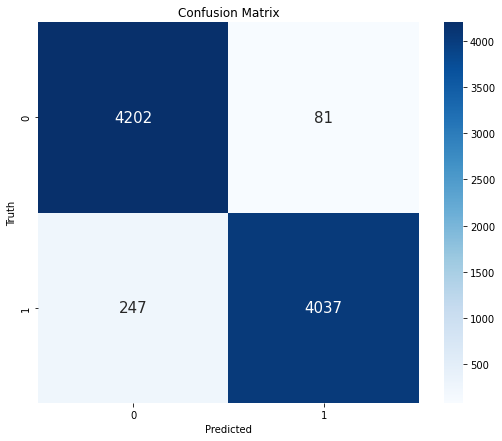

In [85]:
plt.figure(figsize=(9,7))
sns.heatmap(confusion_matrix(y_test,y_pred7),annot=True,square=True,cbar=True,annot_kws={'size':15},fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()